## K-Fold Cross-Validation

### Cross validation (CV) is one of the technique used to test the effectiveness of a machine learning models, it is also a re-sampling procedure used to evaluate a model if we have a limited data.
- The k-fold cross-validation procedure divides a limited dataset into k non-overlapping folds. 
- Each of the k folds is given an opportunity to be used as a held back test set, whilst all other folds collectively are used as a training dataset. 
- CV ensures that every observation from the original dataset has the chance of appearing in training and test set
- A total of k models are fit and evaluated on the k hold-out test sets and the mean performance is reported

![image](https://miro.medium.com/max/1046/1*C5FJt_NH1BWJrFSvw_6jtw.png)

#### Pros 
- computation time reduced 
- reduced bias 
- every data point gets tested
- variance of results reduced as k increases 
- can balance out unbalanced data

#### Cons
- higher training time
- 
- 

### Model Set Up
#### Steps 
- split data randomly into K-folds, K should be between 5 to 10 depending on the data size
- initiate your model 
- run cross val score with model, data, scoring, k folds
- examine results, run a few times to gain better average 


### Single K-Fold Cross Validation model

In [ ]:
import numpy as np
from sklearn.datasets import make_classification # use to create classification data set
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
### create the X, y data sets with parameters ###
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)
### set up the K-Fold ###
cv = KFold(n_splits=10, random_state=1, shuffle=True) # splits between 5-10
### initiate model being used ### 
model = LogisticRegression()
### model metrics ###
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1) # use cross_val_score for evaluation
# report performance
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Accuracy: 0.868 (0.032)


### Repeated K-Fold Cross Validation model
#### The estimate of model performance via k-fold cross-validation can be noisy.  Repeated k-fold cross-validation runs multiple times and reports the mean performance across all folds and all repeats.
#### The expectation of repeated k-fold cross-validation is that the repeated mean would be a more reliable estimate of model performance than the result of a single k-fold cross-validation procedure.
- Common numbers of repeats include 3, 5, and 10
- Appropriate for small datasets and simple models


In [ ]:
import numpy as np
from sklearn.datasets import make_classification # use to create classification data set
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
### create the X, y data sets with parameters ###
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)
### set up the K-Fold ###
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1) # splits between 5-10, repeats 3,5, or 10
### initiate model being used ### 
model = LogisticRegression()
### model metrics ###
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1) # use cross_val_score for evaluation
# report performance
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Accuracy: 0.867 (0.031)


#### Repeated K-Fold Cross Validation + running multiple repeats

>1 mean=0.8680 se=0.011
>2 mean=0.8675 se=0.008
>3 mean=0.8673 se=0.006
>4 mean=0.8670 se=0.006
>5 mean=0.8658 se=0.005
>6 mean=0.8655 se=0.004
>7 mean=0.8651 se=0.004
>8 mean=0.8651 se=0.004
>9 mean=0.8656 se=0.003
>10 mean=0.8658 se=0.003
>11 mean=0.8655 se=0.003
>12 mean=0.8654 se=0.003
>13 mean=0.8652 se=0.003
>14 mean=0.8651 se=0.003
>15 mean=0.8653 se=0.003


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


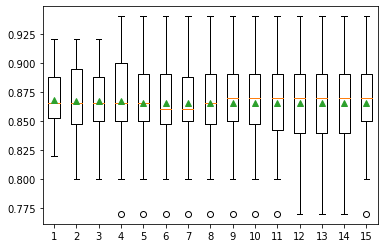

In [ ]:
from scipy.stats import sem
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
 
# evaluate a model with a given number of repeats
def evaluate_model(X, y, repeats):
    cv = RepeatedKFold(n_splits=10, n_repeats=repeats, random_state=1) # splits between 5-10, repeats 3,5, or 10
    ### initiate model being used ### 
    model = LogisticRegression()
    ### generate cross val score ###
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1) # use cross_val_score for evaluation
    return scores
 
### create the X, y data sets with parameters ###
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)
repeats = range(1,16) # set range for repeats to run 
results = list() # create list for results 
for r in repeats: # loop through each repeat 
    scores = evaluate_model(X, y, r) # run the data + repeat through the model function
    print('>%d mean=%.4f se=%.3f' % (r, np.mean(scores), sem(scores))) # show the mean scores and standard deviation scores
    results.append(scores) # add the scores the the results list
### visualize the results ###
plt.boxplot(results, labels=[str(r) for r in repeats], showmeans=True) # box plots summarize the distribution of scores for each number of repeats
# where red and green coincide generally the best 
plt.show()